# Learning Curves

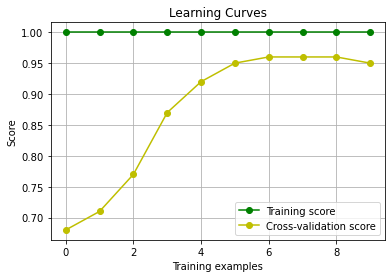

In [5]:
# Import, read, and split data
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

warnings.simplefilter(action='ignore', category=FutureWarning)
data = pd.read_csv('data-lc.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

# Draw chart
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
# TODO: Uncomment one of the three classifiers and then run the cell
# to see the learning curve. 
    
### Logistic Regression (Note: Underfit)
# estimator = LogisticRegression()

### Decision Tree (Note: Just Right)
estimator = GradientBoostingClassifier()

### Support Vector Machine (Note: Overfit)
# estimator = SVC(kernel='rbf', gamma=1000)

draw_learning_curves(X, y, estimator, 10)

## Observations

We can observe from the curves that:

* The Logistic Regression model has a low training and testing score.
* The Decision Tree model has a high training and testing score.
* The Support Vector Machine model has a high training score, and a low testing score.

From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.